## Importing Librareis

In [77]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
#import decision_tree_regressor as dtr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

## Reading Dataset

In [78]:
# Read the data from the xlsx file
df = pd.read_excel('2024_14_1_Halodule uninervis (1) (1).xlsx')
df.head()

,Halodule uninervis,FID,decimalLat,decimalLon,Present.Surface.Temperature.Min,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Max,Present.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,...,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP26.Surface.Temperature.Min,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min
0,Halodule uninervis,0,43.0536,144.9063,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
1,Halodule uninervis,1,43.0566,144.9061,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
2,Halodule uninervis,2,43.0585,144.9060,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
3,Halodule uninervis,3,43.0621,144.9059,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
4,Halodule uninervis,4,43.0639,144.9059,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157


In [79]:
#Present.Surface.Temperature.Min	Present.Surface.Temperature.Mean	Present.Surface.Temperature.Max	Present.Surface.Salinity.Mean

In [80]:
#2050AOGCM.RCP26.Surface.Salinity.Mean	2050AOGCM.RCP26.Surface.Temperature.Max	2050AOGCM.RCP26.Surface.Temperature.Mean.	2050AOGCM.RCP26.Surface.Temperature.Min	2050AOGCM.RCP85.Surface.Salinity.Mean	2050AOGCM.RCP85.Surface.Temperature.Max	2050AOGCM.RCP85.Surface.Temperature.Mean	2050AOGCM.RCP85.Surface.Temperature.Min


In [81]:
#2100AOGCM.RCP26.Surface.Salinity.Mean	2100AOGCM.RCP26.Surface.Temperature.Max	2100AOGCM.RCP26.Surface.Temperature.Mean	2100AOGCM.RCP26.Surface.Temperature.Min	2100AOGCM.RCP85.Surface.Salinity.Mean	2100AOGCM.RCP85.Surface.Temperature.Max	2100AOGCM.RCP85.Surface.Temperature.Mean	2100AOGCM.RCP85.Surface.Temperature.Min


## Cehcking Null values

In [82]:
#checking null values
df.isnull().sum()

Halodule uninervis                           0
FID                                          0
decimalLat                                   0
decimalLon                                   0
Present.Surface.Temperature.Min              0
Present.Surface.Temperature.Mean             0
Present.Surface.Temperature.Max              0
Present.Surface.Salinity.Mean                0
2050AOGCM.RCP26.Surface.Salinity.Mean        0
2050AOGCM.RCP26.Surface.Temperature.Max      0
2050AOGCM.RCP26.Surface.Temperature.Mean.    0
2050AOGCM.RCP26.Surface.Temperature.Min      0
2050AOGCM.RCP85.Surface.Salinity.Mean        0
2050AOGCM.RCP85.Surface.Temperature.Max      0
2050AOGCM.RCP85.Surface.Temperature.Mean     0
2050AOGCM.RCP85.Surface.Temperature.Min      0
2100AOGCM.RCP26.Surface.Salinity.Mean        0
2100AOGCM.RCP26.Surface.Temperature.Max      0
2100AOGCM.RCP26.Surface.Temperature.Mean     0
2100AOGCM.RCP26.Surface.Temperature.Min      0
2100AOGCM.RCP85.Surface.Salinity.Mean        0
2100AOGCM.RCP

In [83]:
#drop FID
df.drop(['FID'], axis=1, inplace=True)

In [84]:
#drop first column
df.drop(df.columns[0], axis=1, inplace=True)

In [85]:
#shape of the data
df.shape

(13842, 22)

In [86]:
#descriptive statistics
df.describe()

,decimalLat,decimalLon,Present.Surface.Temperature.Min,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Max,Present.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,2050AOGCM.RCP26.Surface.Temperature.Mean.,2050AOGCM.RCP26.Surface.Temperature.Min,...,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP26.Surface.Temperature.Min,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min
count,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,...,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000,13842.000000
mean,-18.466705,146.468987,-264.985751,-260.854090,-257.148894,-251.183356,-251.193873,-256.421671,-260.262120,-264.327195,...,-259.803988,-263.740783,-251.220638,-256.815814,-260.311624,-264.200815,-251.543680,-254.428925,-258.289536,-262.551871
std,7.818972,9.844505,1668.375603,1669.083196,1669.717853,1670.740172,1670.738380,1669.842422,1669.184606,1668.488429,...,1669.263140,1668.588993,1670.733794,1669.774895,1669.176167,1668.510181,1670.678459,1670.183978,1669.522683,1668.792709
min,-32.050000,-79.835900,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-22.357310,146.047902,19.567667,24.129883,28.079994,35.152665,35.150902,28.992399,24.789700,20.353025,...,25.304300,20.833175,35.096298,28.605400,24.691799,20.356899,34.786999,30.985399,26.848301,22.257400
50%,-19.881415,148.069595,20.975634,25.299006,29.269993,35.322892,35.309200,29.973499,25.895300,21.709400,...,26.373501,22.336500,35.278801,29.490801,25.854099,21.854000,34.969101,32.061401,27.905500,23.445900
75%,-18.107685,150.639275,21.520061,25.840164,29.619993,35.370032,35.368900,30.185900,26.381599,22.163525,...,26.861799,22.800600,35.382999,29.779699,26.357100,22.337799,35.074501,32.298000,28.399099,23.953401
max,43.067600,178.510000,29.269993,29.789263,34.519230,40.137643,40.207100,35.403000,30.485300,29.440001,...,30.846500,29.962400,40.182800,35.001400,30.523300,30.127399,40.190899,37.773300,32.511902,31.419600


# Checking Distribution

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


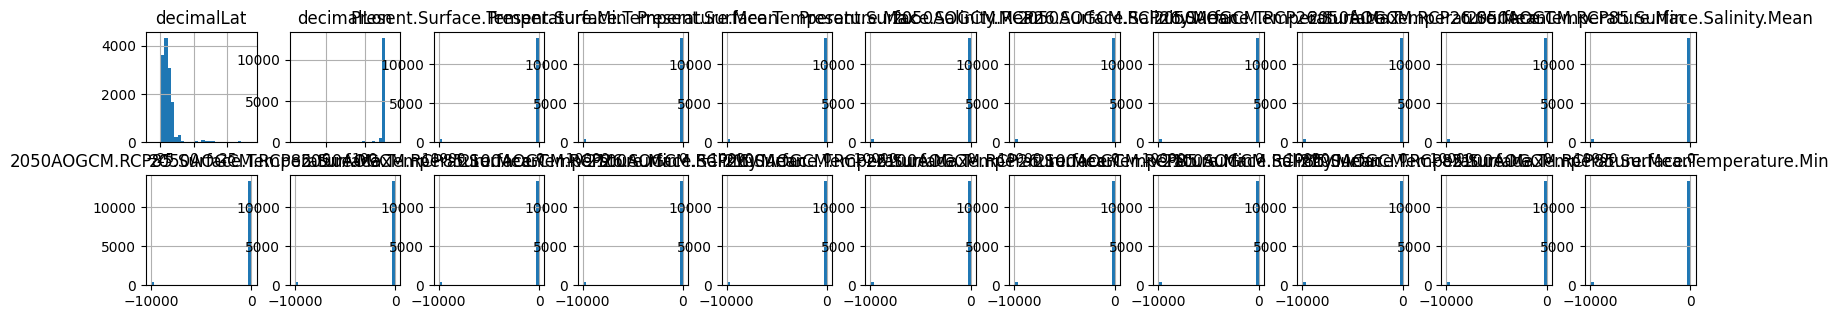

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


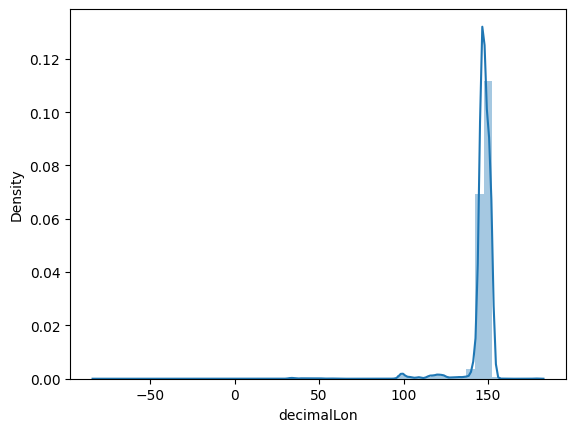

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


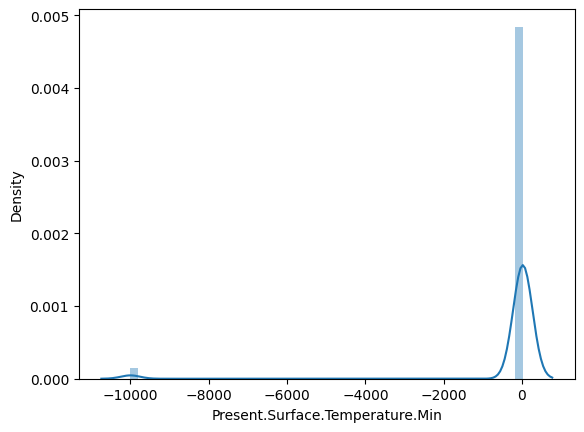

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


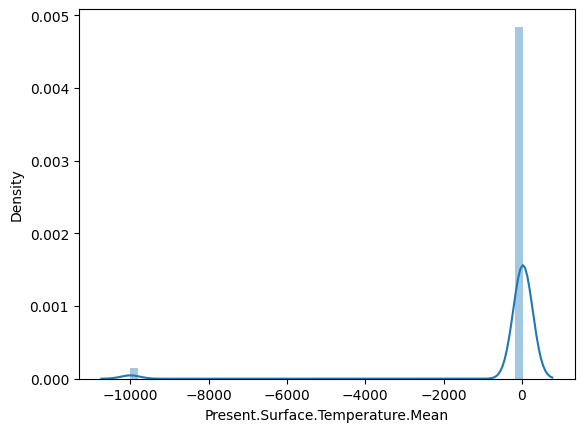

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


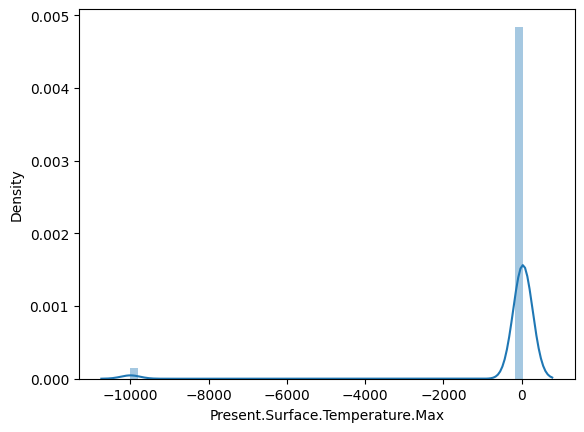

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


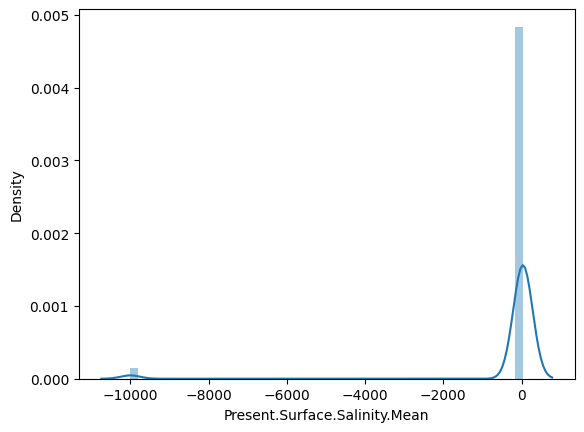

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


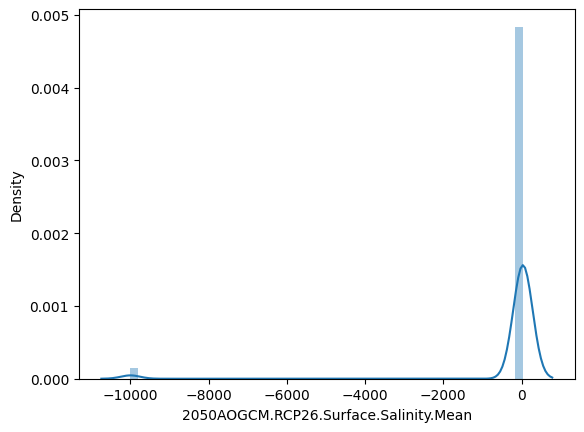

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


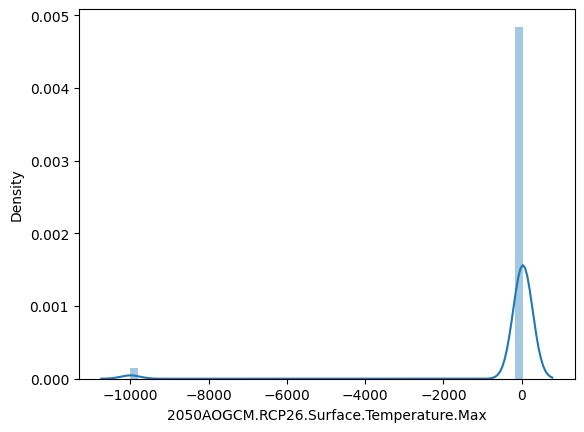

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


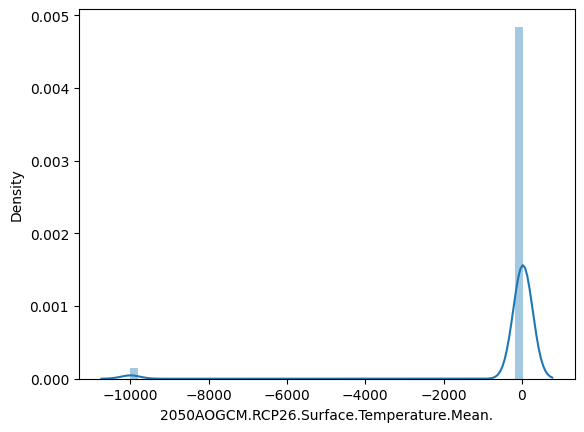

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


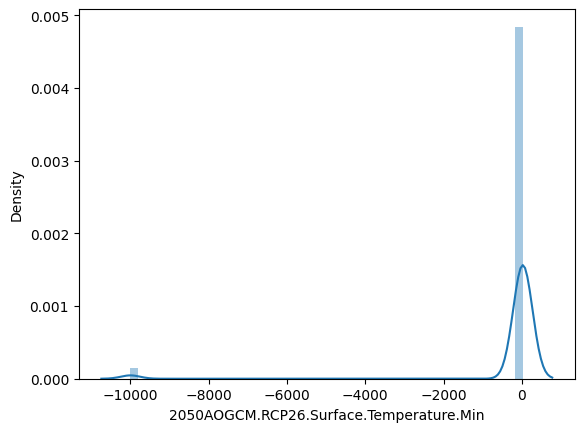

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


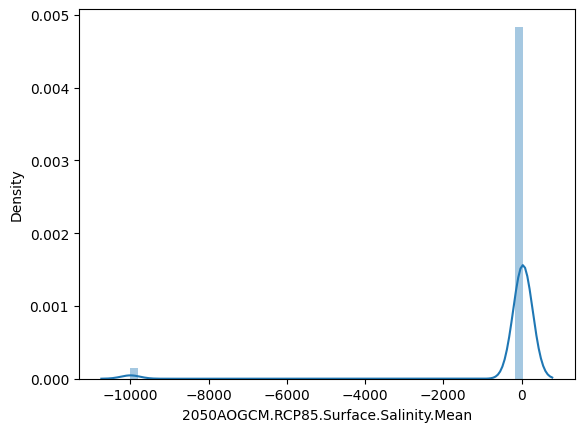

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


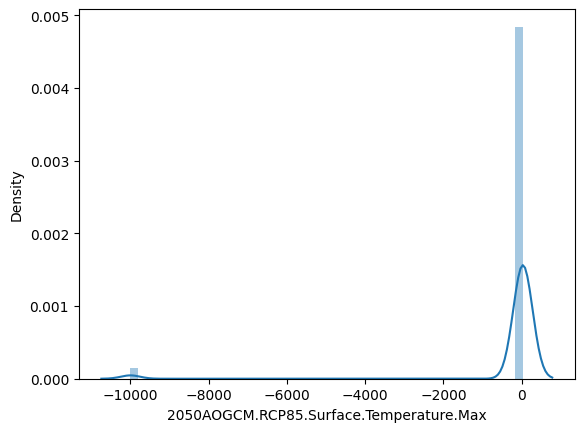

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


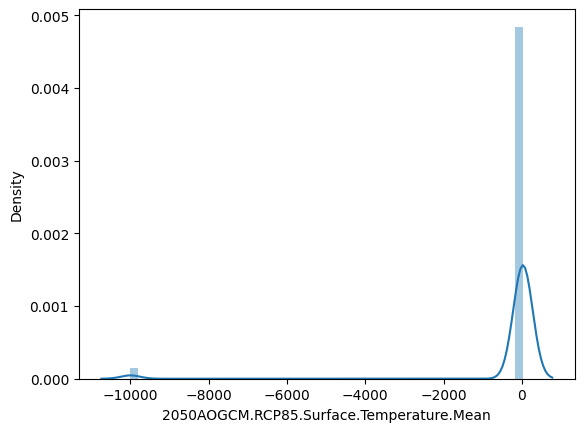

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


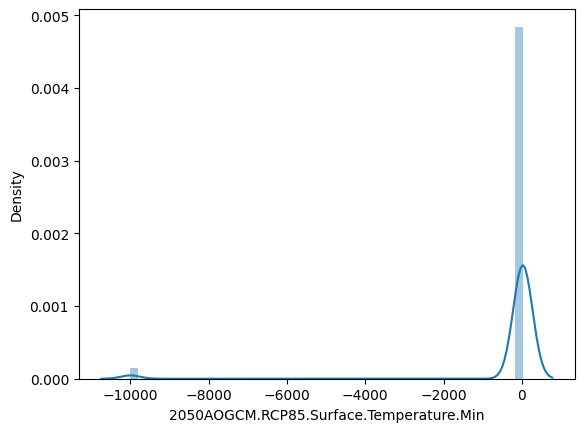

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


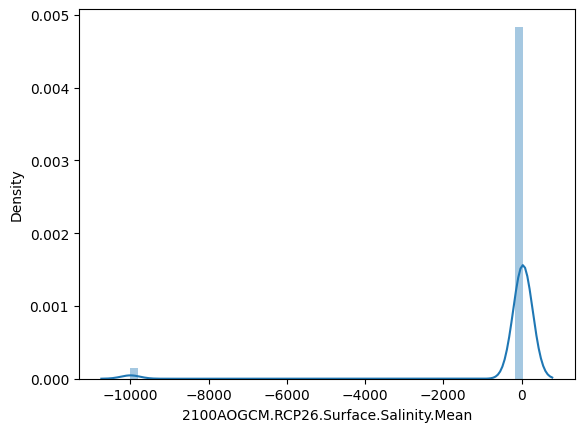

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


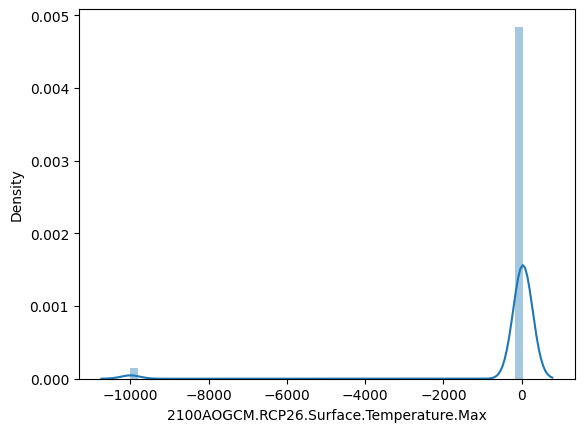

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


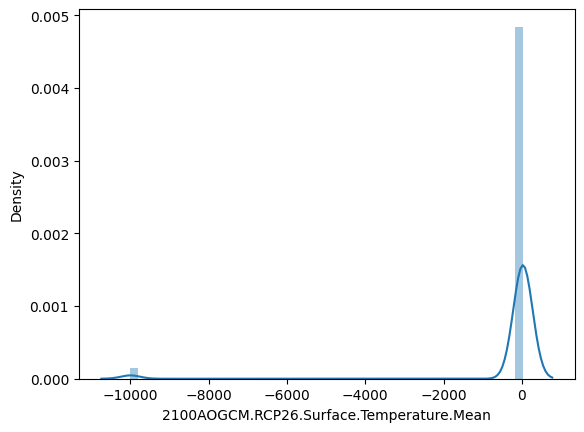

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


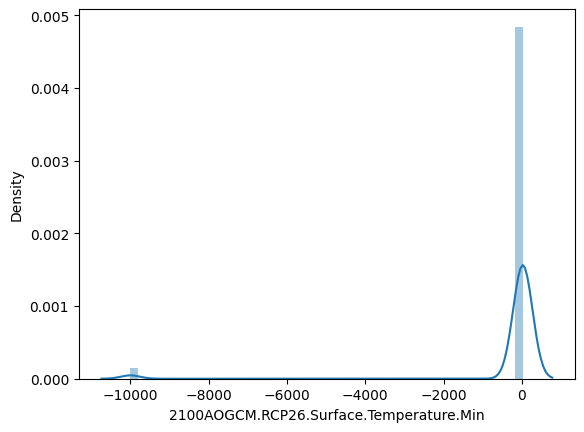

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


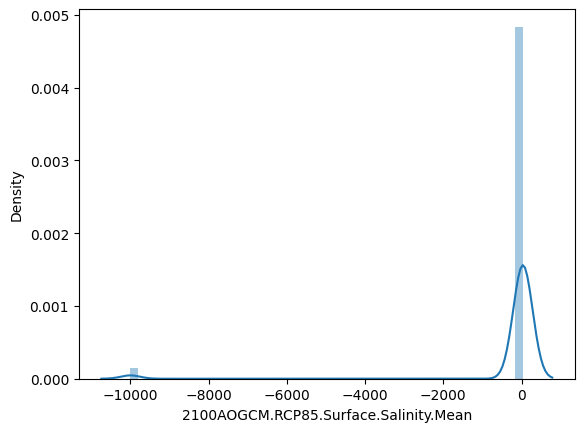

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


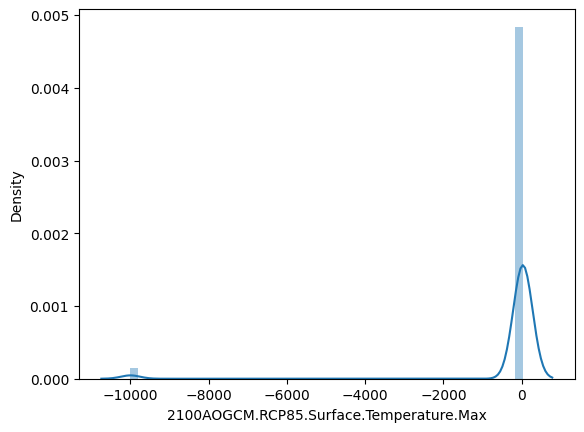

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


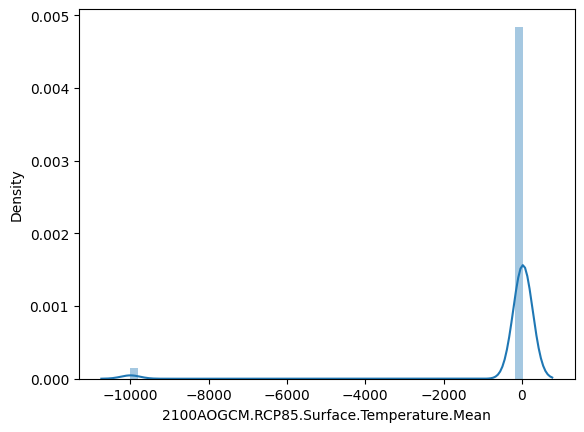

C:\Users\abdul\AppData\Local\Temp\ipykernel_11912\4137856916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


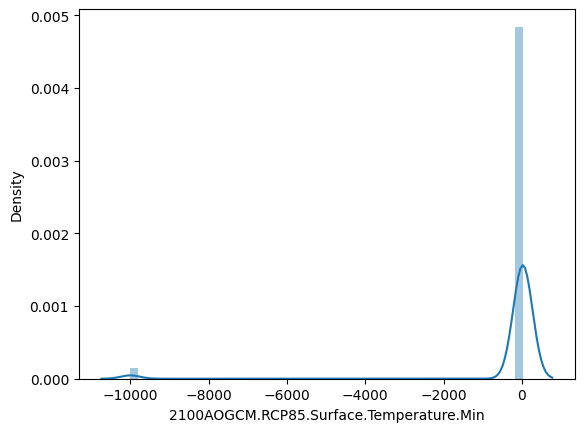

In [87]:
#checking the distribution of all lthe columns using histogram
df.hist(figsize=(20,20), grid=True, layout=(11,11), bins=30)
#checking the distribution of all the numerical columns using distplot
for i in df.columns:
    if df[i].dtype != 'object':
        sns.distplot(df[i])
        plt.show()


In [88]:
#make a copy of df
df1 = df.copy()
df1.head()

,decimalLat,decimalLon,Present.Surface.Temperature.Min,Present.Surface.Temperature.Mean,Present.Surface.Temperature.Max,Present.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Salinity.Mean,2050AOGCM.RCP26.Surface.Temperature.Max,2050AOGCM.RCP26.Surface.Temperature.Mean.,2050AOGCM.RCP26.Surface.Temperature.Min,...,2050AOGCM.RCP85.Surface.Temperature.Mean,2050AOGCM.RCP85.Surface.Temperature.Min,2100AOGCM.RCP26.Surface.Salinity.Mean,2100AOGCM.RCP26.Surface.Temperature.Max,2100AOGCM.RCP26.Surface.Temperature.Mean,2100AOGCM.RCP26.Surface.Temperature.Min,2100AOGCM.RCP85.Surface.Salinity.Mean,2100AOGCM.RCP85.Surface.Temperature.Max,2100AOGCM.RCP85.Surface.Temperature.Mean,2100AOGCM.RCP85.Surface.Temperature.Min
0,43.0536,144.9063,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,9.50725,0.281575,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
1,43.0566,144.9061,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,9.50725,0.281575,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
2,43.0585,144.9060,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,9.50725,0.281575,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
3,43.0621,144.9059,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,9.50725,0.281575,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157
4,43.0639,144.9059,-0.89614,8.248602,18.897469,32.247695,32.231201,20.718201,9.50725,0.281575,...,9.43316,-0.138316,32.0228,20.031401,8.23294,-0.789979,32.041599,24.739099,12.5417,2.54157


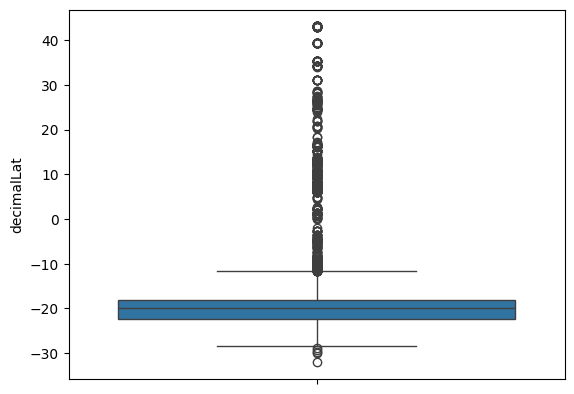

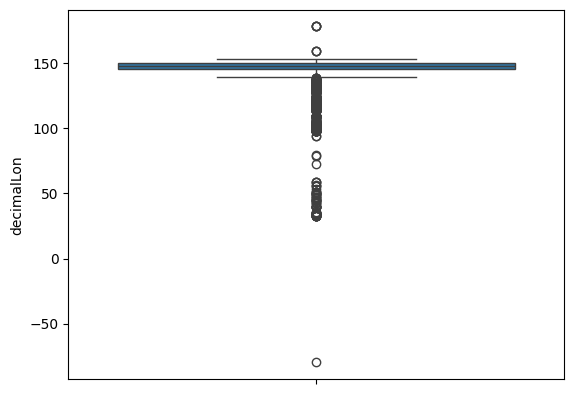

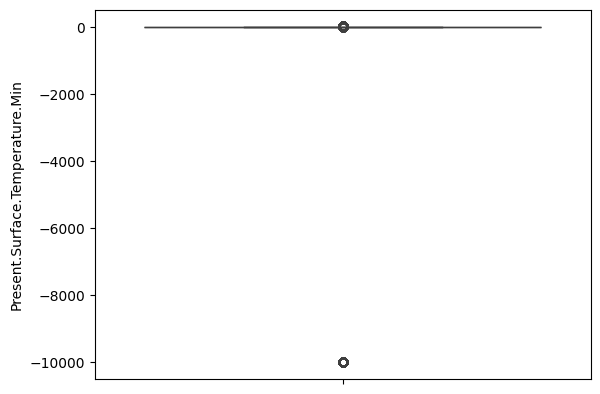

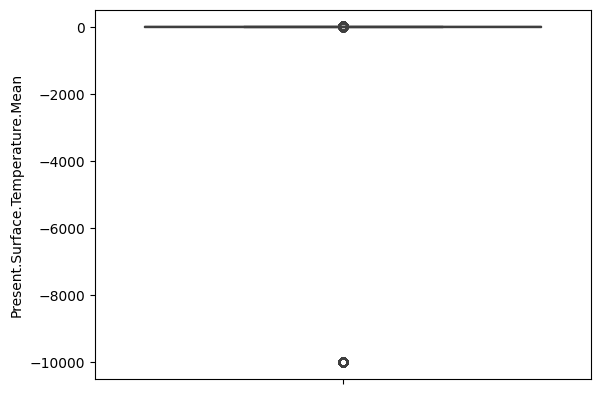

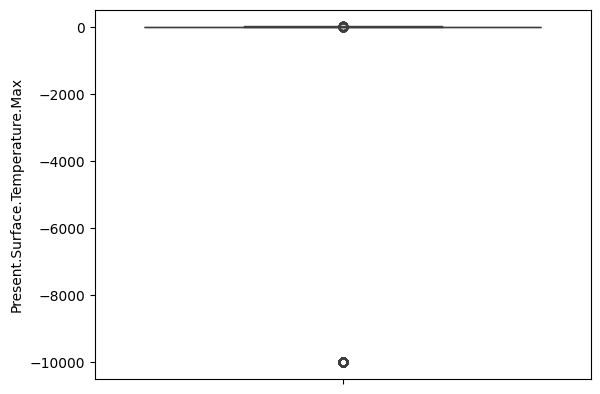

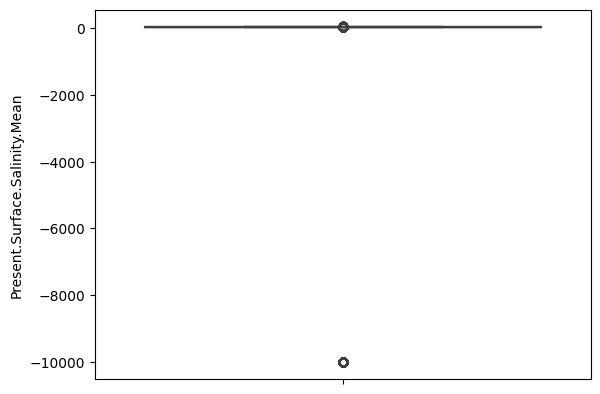

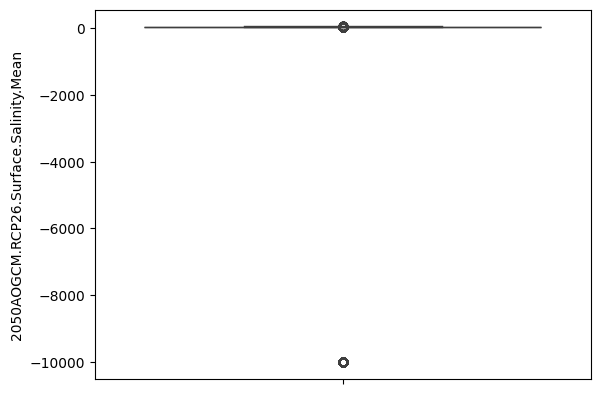

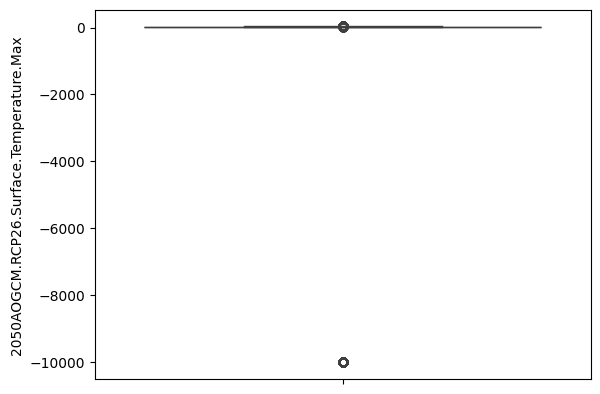

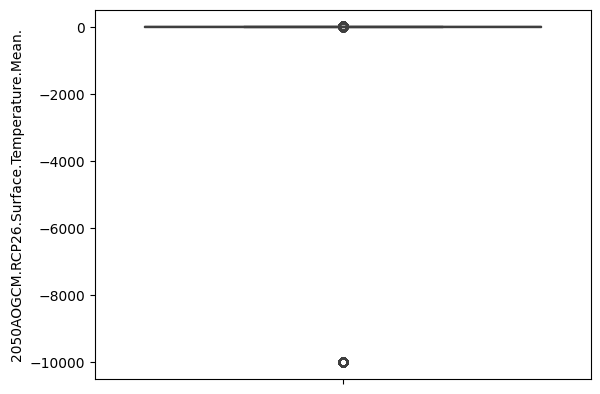

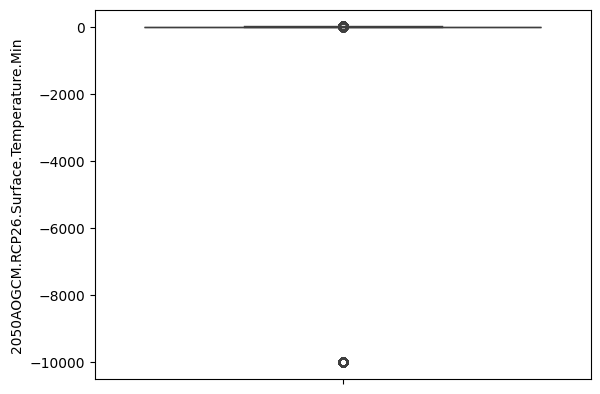

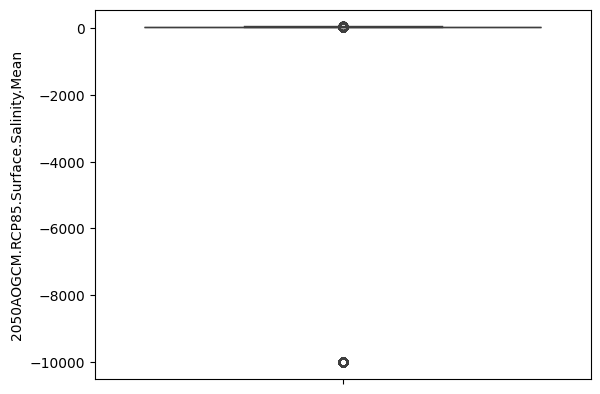

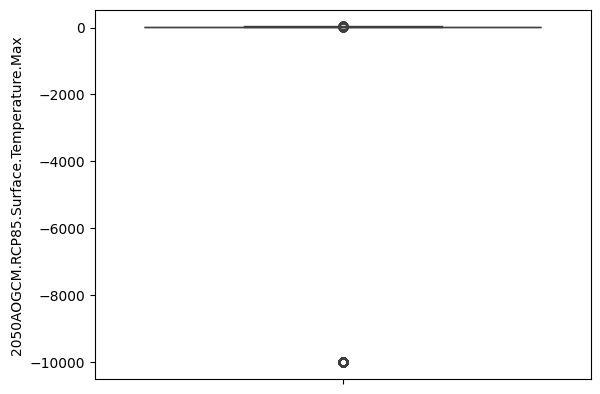

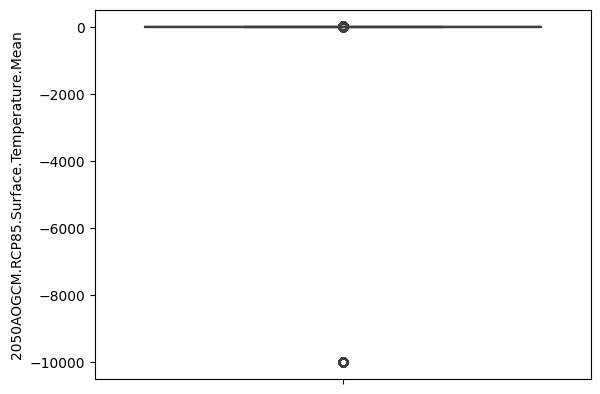

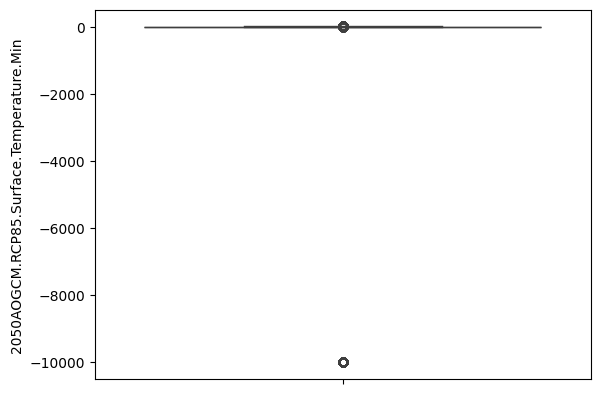

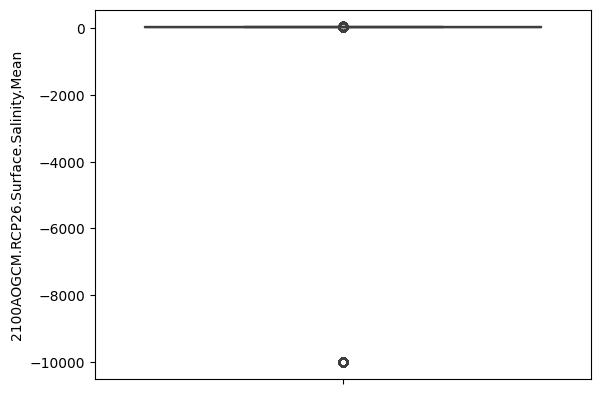

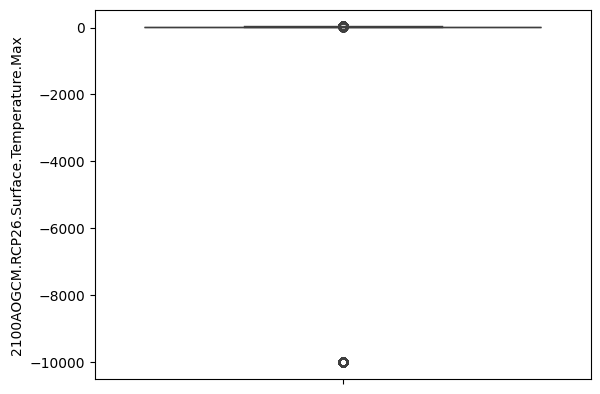

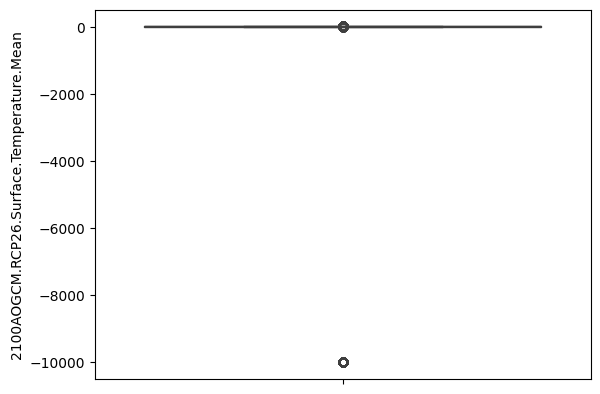

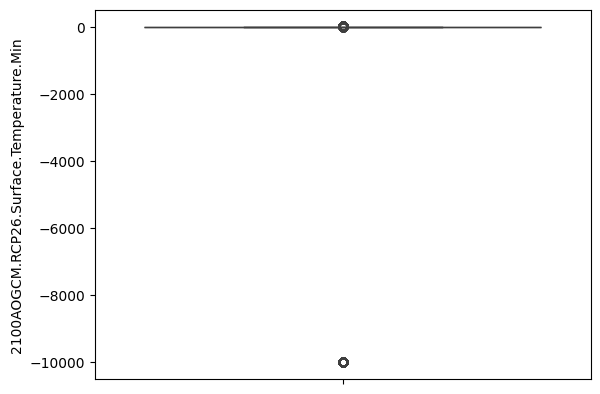

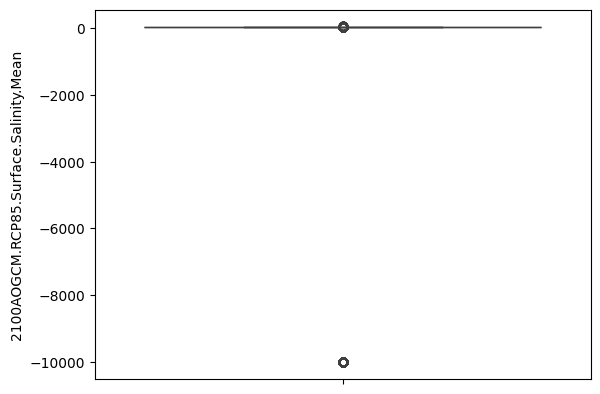

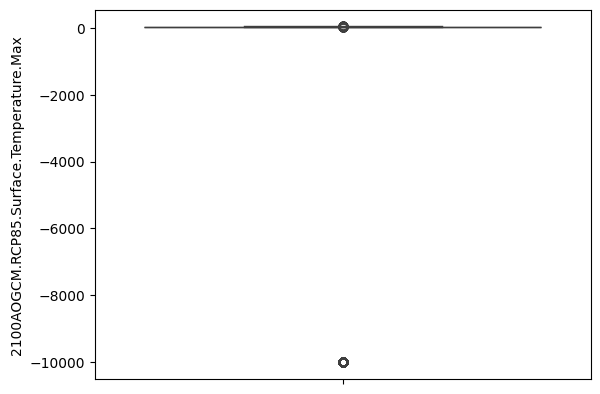

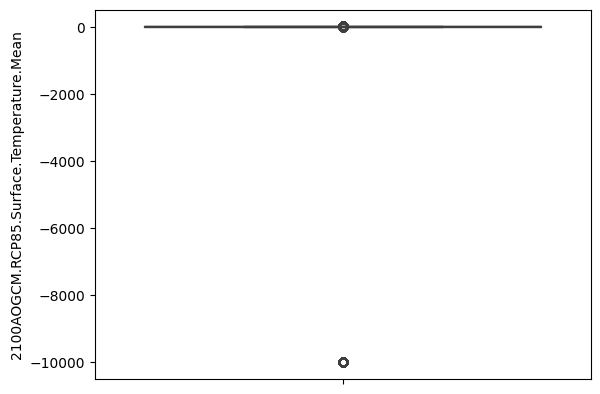

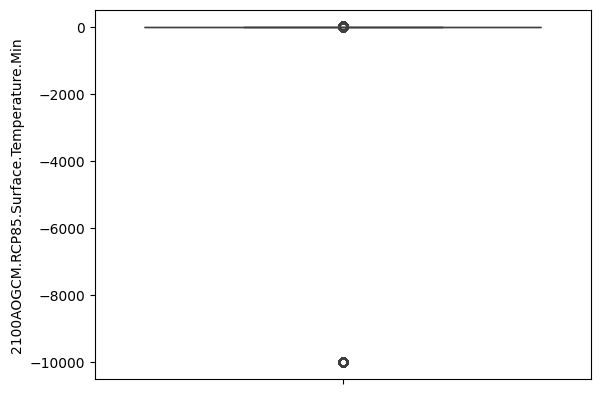

In [89]:
#cheking the distribution of all the columns using boxplot
for i in df1.columns:
    if df1[i].dtype != 'object':
        sns.boxplot(df1[i])
        plt.show()

In [90]:
numeric_cols = df1.select_dtypes(include=[np.number])

# Calculate the IQR for each numeric column
Q1 = numeric_cols.quantile(0.1)
Q3 = numeric_cols.quantile(0.9)
IQR = Q3 - Q1

# Define a multiplier to determine the threshold for outliers
multiplier = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (multiplier * IQR)
upper_bound = Q3 + (multiplier * IQR)

# Identify the outliers using the lower and upper bounds
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
outlier_indices = outliers[outliers].index

# Remove the outliers from the dataframe
clean_df = df1.drop(outlier_indices)

In [91]:
clean_df.shape

(12603, 22)

In [92]:
#Present.Surface.Temperature.Min	Present.Surface.Temperature.Mean	Present.Surface.Temperature.Max	Present.Surface.Salinity.Mean

In [93]:
#2050AOGCM.RCP26.Surface.Salinity.Mean	2050AOGCM.RCP26.Surface.Temperature.Max	2050AOGCM.RCP26.Surface.Temperature.Mean.	2050AOGCM.RCP26.Surface.Temperature.Min	2050AOGCM.RCP85.Surface.Salinity.Mean	2050AOGCM.RCP85.Surface.Temperature.Max	2050AOGCM.RCP85.Surface.Temperature.Mean	2050AOGCM.RCP85.Surface.Temperature.Min


In [94]:
#2100AOGCM.RCP26.Surface.Salinity.Mean	2100AOGCM.RCP26.Surface.Temperature.Max	2100AOGCM.RCP26.Surface.Temperature.Mean	2100AOGCM.RCP26.Surface.Temperature.Min	2100AOGCM.RCP85.Surface.Salinity.Mean	2100AOGCM.RCP85.Surface.Temperature.Max	2100AOGCM.RCP85.Surface.Temperature.Mean	2100AOGCM.RCP85.Surface.Temperature.Min


In [95]:

#drop two target columns with name A and B from X
X = clean_df[['Present.Surface.Temperature.Min','Present.Surface.Temperature.Mean',	'Present.Surface.Temperature.Max','Present.Surface.Salinity.Mean']]
# add htese two columns 'decimalLat', 'decimalLon' in y
y = clean_df[['decimalLat', 'decimalLon']]



In [96]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9996301060505016
Score for output variable 2 using RandomForestRegressor: 0.9992427877771612
Score for output variable 1 using Ridge: 0.9658262067759164
Score for output variable 2 using Ridge: 0.9600101747994837
Score for output variable 1 using Lasso: 0.816178730433635
Score for output variable 2 using Lasso: 0.6317647625519047
Score for output variable 1 using ElasticNet: 0.8414227915294187
Score for output variable 2 using ElasticNet: 0.7485598600346324
Score for output variable 1 using LinearRegression: 0.9658032791246732
Score for output variable 2 using LinearRegression: 0.9600840794044343
Score for output variable 1 using SVR: 0.9802827669299706
Score for output variable 2 using SVR: 0.9704667071617906


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for output variable 1 using MLPRegressor: 0.9486652179667329
Score for output variable 2 using MLPRegressor: 0.9404109631049455
Score for output variable 1 using KNeighborsRegressor: 0.9994069993713343
Score for output variable 2 using KNeighborsRegressor: 0.998825630637767


In [98]:
# List of machine learning models
models = [GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")

Score for output variable 1 using GradientBoostingRegressor: 0.9989579214793068
Score for output variable 2 using GradientBoostingRegressor: 0.998276199297145
Score for output variable 1 using AdaBoostRegressor: 0.9851741130968059
Score for output variable 2 using AdaBoostRegressor: 0.974765260244407
Score for output variable 1 using DecisionTreeRegressor: 0.9995475225293001
Score for output variable 2 using DecisionTreeRegressor: 0.9990578036513138
Score for output variable 1 using BaggingRegressor: 0.9995353923674147
Score for output variable 2 using BaggingRegressor: 0.9991068292706996
Score for output variable 1 using ExtraTreesRegressor: 0.9997319501913319
Score for output variable 2 using ExtraTreesRegressor: 0.9993664980008135
Score for output variable 1 using XGBRegressor: 0.999357283539887
Score for output variable 2 using XGBRegressor: 0.9989890977441378


In [99]:
#check Multiooutput regressor wiith ExtraTreeREgressor
multi_model = MultiOutputRegressor(ExtraTreesRegressor())
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)
for i, target in enumerate(multi_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")



Score for output variable 1 using XGBRegressor: 0.999748560957708
Score for output variable 2 using XGBRegressor: 0.9994449608151718


In [100]:
#dump through pickle
import pickle
pickle.dump(multi_model, open('best_model_Halodule_Unnivers_current_14_jan_2024.pkl','wb'))

In [101]:

#drop two target columns with name A and B from X
X = clean_df[["2050AOGCM.RCP26.Surface.Salinity.Mean", "2050AOGCM.RCP26.Surface.Temperature.Max", "2050AOGCM.RCP26.Surface.Temperature.Mean.", "2050AOGCM.RCP26.Surface.Temperature.Min", "2050AOGCM.RCP85.Surface.Salinity.Mean", "2050AOGCM.RCP85.Surface.Temperature.Max", "2050AOGCM.RCP85.Surface.Temperature.Mean", "2050AOGCM.RCP85.Surface.Temperature.Min"]]
# add htese two columns 'decimalLat', 'decimalLon' in y
y = clean_df[['decimalLat', 'decimalLon']]



In [102]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9993050462094415
Score for output variable 2 using RandomForestRegressor: 0.9992688030606254
Score for output variable 1 using Ridge: 0.9866915173525547
Score for output variable 2 using Ridge: 0.986140060875522
Score for output variable 1 using Lasso: 0.811308248128481
Score for output variable 2 using Lasso: 0.629574575916933
Score for output variable 1 using ElasticNet: 0.8577178717213151
Score for output variable 2 using ElasticNet: 0.7435951816179676
Score for output variable 1 using LinearRegression: 0.9936378193707506
Score for output variable 2 using LinearRegression: 0.9943665825451553
Score for output variable 1 using SVR: 0.9773246840473657
Score for output variable 2 using SVR: 0.9705191658513854
Score for output variable 1 using MLPRegressor: 0.9515803841293391
Score for output variable 2 using MLPRegressor: 0.960073071652318
Score for output variable 1 using KNeighborsRegressor: 0.9993451820666638
Score for output

In [104]:
# List of machine learning models
models = [GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")

Score for output variable 1 using GradientBoostingRegressor: 0.9987979344205916
Score for output variable 2 using GradientBoostingRegressor: 0.9980583062890247
Score for output variable 1 using AdaBoostRegressor: 0.9904146547100237
Score for output variable 2 using AdaBoostRegressor: 0.9745579720788942
Score for output variable 1 using DecisionTreeRegressor: 0.9991848643129408
Score for output variable 2 using DecisionTreeRegressor: 0.9987558156311638
Score for output variable 1 using BaggingRegressor: 0.9992955638179063
Score for output variable 2 using BaggingRegressor: 0.9991310551545516
Score for output variable 1 using ExtraTreesRegressor: 0.999743138016233
Score for output variable 2 using ExtraTreesRegressor: 0.9994675008174896
Score for output variable 1 using XGBRegressor: 0.9992162413928691
Score for output variable 2 using XGBRegressor: 0.9990186753045817


In [105]:
#check Multiooutput regressor wiith ExtraTreeREgressor
multi_model = MultiOutputRegressor(ExtraTreesRegressor())
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)
for i, target in enumerate(multi_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")



Score for output variable 1 using XGBRegressor: 0.9997489043387622
Score for output variable 2 using XGBRegressor: 0.9994637324738781


In [106]:
#dump through pickle
import pickle
pickle.dump(multi_model, open('best_model_Halodule_Unnivers_2050_14_jan_2024.pkl','wb'))

In [107]:

#drop two target columns with name A and B from X
X = clean_df[["2100AOGCM.RCP26.Surface.Salinity.Mean", "2100AOGCM.RCP26.Surface.Temperature.Max", "2100AOGCM.RCP26.Surface.Temperature.Mean", "2100AOGCM.RCP26.Surface.Temperature.Min", "2100AOGCM.RCP85.Surface.Salinity.Mean", "2100AOGCM.RCP85.Surface.Temperature.Max", "2100AOGCM.RCP85.Surface.Temperature.Mean", "2100AOGCM.RCP85.Surface.Temperature.Min"]]
# add htese two columns 'decimalLat', 'decimalLon' in y
y = clean_df[['decimalLat', 'decimalLon']]



In [108]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
# List of machine learning models
models = [RandomForestRegressor(random_state=42), Ridge(), Lasso(), ElasticNet(), LinearRegression(), SVR(), MLPRegressor(), KNeighborsRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")


Score for output variable 1 using RandomForestRegressor: 0.9985633616360372
Score for output variable 2 using RandomForestRegressor: 0.9992952727475672
Score for output variable 1 using Ridge: 0.9827723692700366
Score for output variable 2 using Ridge: 0.9775603280989661
Score for output variable 1 using Lasso: 0.8009813969469517
Score for output variable 2 using Lasso: 0.6242096869206979
Score for output variable 1 using ElasticNet: 0.8572056873146906
Score for output variable 2 using ElasticNet: 0.750840609281304
Score for output variable 1 using LinearRegression: 0.9828174536976788
Score for output variable 2 using LinearRegression: 0.9806138372623793
Score for output variable 1 using SVR: 0.9814124925504307
Score for output variable 2 using SVR: 0.9734854585550425


c:\Users\abdul\anaconda3\envs\three_specie\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score for output variable 1 using MLPRegressor: 0.9525422946077983
Score for output variable 2 using MLPRegressor: 0.9557882359701656
Score for output variable 1 using KNeighborsRegressor: 0.9987307135397891
Score for output variable 2 using KNeighborsRegressor: 0.9986357199451283


In [110]:
# List of machine learning models
models = [GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(), BaggingRegressor(), ExtraTreesRegressor(), XGBRegressor()]

# Loop through each model
for model in models:
    # Create the MultiOutputRegressor model
    multi_model = MultiOutputRegressor(model)
    
    # Fit the model on the training data
    multi_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = multi_model.predict(X_test)
    
    # Calculate and print the score for each output variable
    for i, target in enumerate(multi_model.estimators_):
        score = target.score(X_test, y_test.iloc[:, i])
        print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")

Score for output variable 1 using GradientBoostingRegressor: 0.9984905203344089
Score for output variable 2 using GradientBoostingRegressor: 0.9984901730426912
Score for output variable 1 using AdaBoostRegressor: 0.9778203437819382
Score for output variable 2 using AdaBoostRegressor: 0.9785664452286688
Score for output variable 1 using DecisionTreeRegressor: 0.998037195286342
Score for output variable 2 using DecisionTreeRegressor: 0.9988169186149307
Score for output variable 1 using BaggingRegressor: 0.9986290535752254
Score for output variable 2 using BaggingRegressor: 0.9991164499447124
Score for output variable 1 using ExtraTreesRegressor: 0.9993896405925741
Score for output variable 2 using ExtraTreesRegressor: 0.9994375385092503
Score for output variable 1 using XGBRegressor: 0.9991749437582423
Score for output variable 2 using XGBRegressor: 0.9991006353300363


In [111]:
#check Multiooutput regressor wiith ExtraTreeREgressor
multi_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)
for i, target in enumerate(multi_model.estimators_):
    score = target.score(X_test, y_test.iloc[:, i])
    print(f"Score for output variable {i+1} using {type(model).__name__}: {score}")



Score for output variable 1 using XGBRegressor: 0.9985633616360372
Score for output variable 2 using XGBRegressor: 0.9992952727475672


In [112]:
#dump through pickle
import pickle
pickle.dump(multi_model, open('best_model_Halodule_Unnivers_2100_14_jan_2024.pkl','wb'))